https://towardsdatascience.com/a-closer-look-at-scipys-stats-module-part-1-5071858f32c1


In [ ]:
from scipy import stats as scs
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Distributions

c:\Users\jilbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


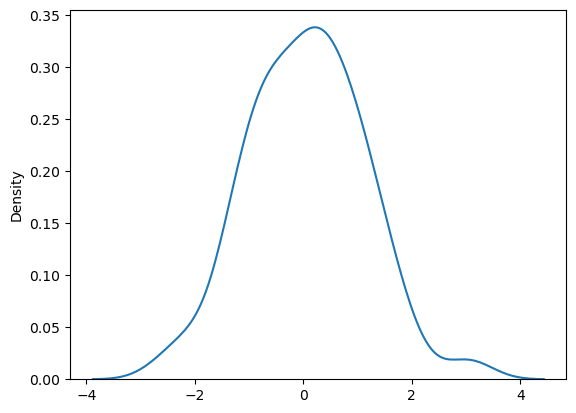

In [5]:
# normal distribution
normal = scs.norm.rvs(loc=0, scale=1, size=100)
sns.kdeplot(normal); 

c:\Users\jilbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


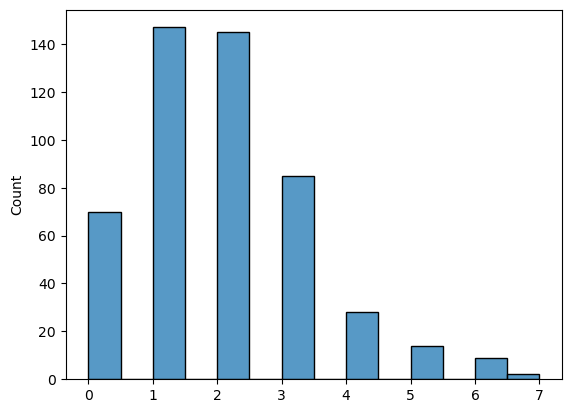

In [6]:
# poison distribution
pois = scs.poisson.rvs(mu=2, size=500)

#plot
sns.histplot(pois);

c:\Users\jilbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


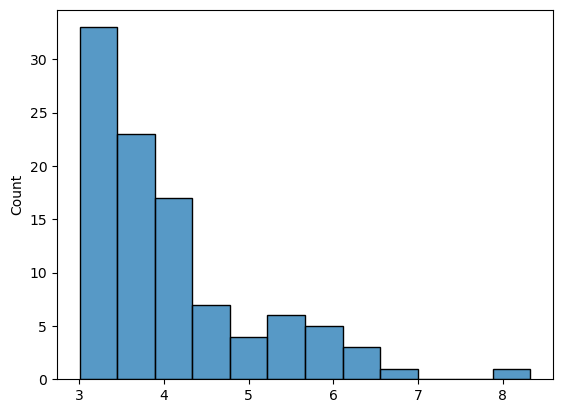

In [7]:
# exponential distribution
expo = scs.expon.rvs(loc=3, scale=1, size=100, random_state=12)

# plot
sns.histplot(expo);

We can also create the Cumulative Distribution Function (CDF) — to calculate the probability of a number being more extreme than the one you are testing — and/or Probability Density Function (PDF) — to calculate what is the probability density around a number in a distribution.

The Probability Density Function (PDF) will give us the density of the probability around the number, or how concentrated the probability is around that number. So, it is expected that the density will be high near to the average.

In [8]:
scs.norm.cdf(normal)
scs.norm.pdf(normal)

array([0.37519886, 0.21183133, 0.25089615, 0.1391114 , 0.20358896,
       0.30405105, 0.29661555, 0.38591228, 0.34942278, 0.37443133,
       0.39848312, 0.37860515, 0.39253191, 0.16678506, 0.39825485,
       0.3242416 , 0.38795986, 0.32336749, 0.11817536, 0.29069009,
       0.33099322, 0.36066931, 0.32367709, 0.2775782 , 0.37901129,
       0.22600876, 0.14459787, 0.13770377, 0.39888589, 0.26864348,
       0.05098064, 0.36956003, 0.14796916, 0.26912333, 0.39757437,
       0.37967735, 0.2624271 , 0.3948629 , 0.37129475, 0.30630087,
       0.37757981, 0.0054953 , 0.01335688, 0.3982735 , 0.12162361,
       0.06844176, 0.39694978, 0.32380913, 0.16362822, 0.38284196,
       0.06043928, 0.37728827, 0.13689987, 0.35478393, 0.25828293,
       0.17908356, 0.25164308, 0.1930802 , 0.38214957, 0.39158894,
       0.30028491, 0.36020519, 0.07583323, 0.1816707 , 0.39532721,
       0.31360493, 0.38439778, 0.21278752, 0.24878997, 0.38544747,
       0.14652737, 0.13074572, 0.33957483, 0.32252214, 0.35605

Probability Density at the mean:  0.07054625186263343
Probability that a number will be 10:  0.00014109250299032539


c:\Users\jilbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


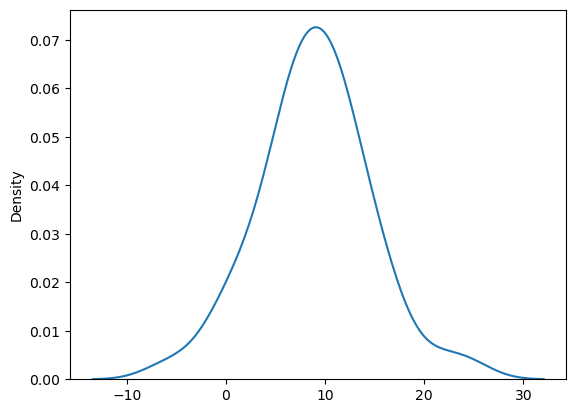

In [ ]:
# Normal distribution
normal = scs.norm.rvs(loc=10, scale=5, size=50, random_state=12)

sns.kdeplot(normal); 

# Mean and Standard Deviation
mu = normal.mean()
sd = normal.std()

# Probability Density at the mean
print('Probability Density at the mean: ', scs.norm.pdf(10, loc=mu, scale=sd))

# Use Case: : What is the probability that a number will be 10
#The actual probability of a number falling on the mean point (10) is much lower, knowing that a continuous distribution has almost infinite values (10.01, 10.02, 10.001, etc).
print('Probability that a number will be 10: ', scs.norm.cdf(10.001, loc=mu, scale=sd) - scs.norm.cdf(9.999, loc=mu, scale=sd))



Statistics

In [18]:
# Creating a normal distribution
d = scs.norm.rvs(loc=0, scale=1, size=100, random_state=12)
# Describe
scs.describe(d)

DescribeResult(nobs=100, minmax=(-3.14741652154398, 2.8718193949889166), mean=-0.14430749763868853, variance=1.1050630588641528, skewness=0.05470178363174691, kurtosis=0.27834782892208176)

In [ ]:
#tmean is a nice method to calculate the trimmed mean where you can add the mean within given lower and upper limits, or trimmed min, max, var, standard dev.
# Mean only of the values between 1 and 3 in the distribution d
scs.tmean(d, (1,3))

1.5427740357627466

In [20]:
#We can rank data using rankdata. Observe as it even shows the ties.
d = [1,1,2,7,3,4,5,6]
scs.rankdata(d)

array([1.5, 1.5, 3. , 8. , 4. , 5. , 6. , 7. ])

In [21]:
#We can find the repetitions of an array.
scs.find_repeats([1,2,3,3,4,5,6])


RepeatedResults(values=array([3.]), counts=array([2], dtype=int64))

Hypothesis Tests

In Data Science, hypothesis tests are a must for different occasions. We should compare numbers and remove the uncertainty that the result we’re seeing is not by chance. Thus the utility of a hypothesis test.

Say you heard about these jobs from a company that claims it is paying over the average of the market for the job roles announced. It pays $120k, $115k, $125k, $138k for different roles in Data Science.

Curious to know if that statement is true or not, you research on websites and find out that the average salary for a Data Scientist in your state is around $130k. So, is the company telling a true statement or not, according to statistics?
We can easily solve that problem with a Scipy hypothesis test for one sample against the population mean.

In [ ]:
# Company salary
company = [120, 115, 125, 138]

# Market average
mkt = 130

# Hypothesis test
# Null: Company pays less than the market average
# Alternative: Company pays more than the market 
scs.ttest_1samp(company, popmean=mkt, alternative='greater')

# The result, with a 0.05 significance level, shows a p-value of 0.82, therefore, we cannot reject the null hypothesis that the market is paying more on average than the company.
# We conclude that the company is not publishing a true statement, according to statistics.

TtestResult(statistic=-1.1130623746355601, pvalue=0.8265797321607529, df=3)

There is the binomtest that uses a Bernoulli distribution to test the probability of success of a binomial test: is event or is not event. Let’s say you have a coffee shop and you assess that 8% of 150 customers are buying a new drink, so 12 customers. Can we test if, in the same environment (given the same probability of success = 8%), if we could see 20 customers buying the new drink? The significance level is 0.05.

In [ ]:
# Binomial Test
successes = 20
trials = 150
p = 0.08

scs.binomtest(successes, trials, p, alternative='greater')
# As our p-value = 0.016, it’s smaller than the significance level, therefore we reject the null hypothesis and conclude that, under those conditions,
#  it is not probable that 20 customers will buy the new drink in a day.


BinomTestResult(k=20, n=150, alternative='greater', statistic=0.13333333333333333, pvalue=0.01684360036905186)

To test for normality, there are many ways. In Scipy, the normaltest method compares a given sample to a normal distribution. The null hypothesis is that the sample is normal. If you get a p-value under your significance level, then it is not normally distributed. Next, we can see the test with a normal distribution and an exponential one. Works as expected.


In [24]:
# Normal Test
d_norm = scs.norm.rvs(loc=0, scale=1, size=100, random_state=12)
d_expon = scs.expon.rvs(loc=3, scale=1, size=100, random_state=12)

print("Normal:",scs.normaltest(d_norm))
print("Exponential:", scs.normaltest(d_expon))

Normal: NormaltestResult(statistic=0.8190182789113444, pvalue=0.6639760898237252)
Exponential: NormaltestResult(statistic=33.69547265654829, pvalue=4.820821820360837e-08)


Besides that, we have other famous normality tests like shapiro, anderson, as well as Kolmogorov-Smirnov ks_1samp for goodness of fit against another distribution.

In [29]:
distr = scs.norm.rvs(loc=0, scale=1, size=100, random_state=12)
stats = scs.describe(distr)

# Shapiro (for samples up to 5000)
scs.shapiro(distr)

# Anderson
scs.anderson(distr)

# KS test vs normal distribution
scs.ks_1samp(distr, scs.norm.pdf)

KstestResult(statistic=0.993543138091697, pvalue=2.0099248917068777e-219, statistic_location=2.8718193949889166, statistic_sign=1)

https://towardsdatascience.com/a-closer-look-at-scipys-stats-module-part-2-203d27a71fa3

Comparing Two Samples
Comparing two samples is a common task for data scientists. In Scipy, we can use the two independent samples test when we want to check if two different samples were drawn from the same distribution, thus have statistically similar averages.

In [ ]:
# Two samples test: Comparison of means

# Sample 1
samp1 = scs.norm.rvs(loc=2, scale=5, size=100, random_state=12)
# Sample 2
samp2 = scs.norm.rvs(loc=3, scale=3, size=100, random_state=12)

# Hypothesis test
#The result on a significance level of 0.05 means that the null hypothesis is rejected in favor of the alternative, meaning that the samples don’t have statistically equal means.
scs.ttest_ind(samp1, samp2, equal_var=False)


Ttest_indResult(statistic=-2.1022782237188657, pvalue=0.03707419180231478)

It is important to register that there is an argument in the T-Test for comparison of means that is the equal_var. When the samples don’t have similar variances, the argument should be set to false.

One of the ways to detect that is using the levene test.

In [ ]:
# Levene for equal variances test
#The resultant p-value rejects Ho in favor of Ha, confirming that the samples have different variances.
scs.levene(samp1, samp2)

LeveneResult(statistic=18.17151743553794, pvalue=3.122280303965808e-05)

In [ ]:
# And we can confirm the different variation of the samples looking at that thevariation function. The sample 1 varies 4 times more than sample 2.
scs.variation(samp1), scs.variation(samp2)

(4.090657648137783, 1.2223438764152452)

In [33]:
#We also have the two related samples test, which is pretty similar code.
# Hypothesis test
scs.ttest_rel(samp1, samp2)

TtestResult(statistic=-6.129141596042767, pvalue=1.8073268109209095e-08, df=99)

Similarly, there is the Kolmogorov-Smirnov comparison of two samples. The KS test will compare both samples' empirical cumulative distributions to determine if they match closely or not, helping to test if they can be from the same population.

In [36]:
# KS test for two samples
scs.ks_2samp(samp1, samp2, alternative='two-sided')

KstestResult(statistic=0.23, pvalue=0.009878183186176536, statistic_location=-0.6420216040718096, statistic_sign=1)

Resampling
Scipy has functions for resampling, such as Bootstrap and Monte Carlo simulations.

Bootstrap
First, bootstrap. It takes the sample and calculates the chosen statistic N times, returning the confidence interval of it.

In [ ]:
# Bootstrap
dist = scs.norm.rvs(loc=10, scale=1, size=300, random_state=12)

dist = (dist,)  # samples must be in a sequence, as per documentation
scs.bootstrap(dist, statistic=np.mean, confidence_level=0.95)

BootstrapResult(confidence_interval=ConfidenceInterval(low=9.717669369107561, high=9.95510695304447), bootstrap_distribution=array([9.86233342, 9.79830619, 9.8457926 , ..., 9.8418519 , 9.80594041,
       9.77734848]), standard_error=0.060158768197642584)

Monte Carlo Test

Now, monte_carlo_test is a little more complex to understand. It took me some time to study and understand what’s behind it. I left in the Reference section a couple of good articles for you to get more familiar with it, in case you want to deepen your knowledge.

In a nutshell, what this function does is comparing the statistic calculated from the provided sample with the same statistic from a bunch of synthetic normal samples, under the null hypothesis that the sample is normally distributed. If you get a more extreme value, then the null hypothesis that both samples are from the same distribution is discarded.

Let’s see that in action. Suppose we have a sample of 10 people with weight 70kg on average and standard deviation of 10kg. Now let’s test it using Monte Carlo simulations (10k simulations) if that sample is statistically heavier on average than the population (65kg avg +/- 10kg std) on a 95% confidence level.

In [ ]:
# Generate a sample from a normally distribution
x = scs.norm.rvs(loc=70, scale=10, size=10).astype(np.int32)
rvs = lambda size: scs.norm.rvs(loc=65, scale=10, size=size).astype(np.int32)

# Monte Carlo Test
#According to our simulations, the p-Value is higher than the significance level of 5%, thus we fail to reject the null hypothesis and conclude that the sample group 
# is not in fact heavier than the true population.
scs.monte_carlo_test(x, rvs, np.mean, n_resamples=10000, alternative='greater')

MonteCarloTestResult(statistic=67.2, pvalue=0.1942805719428057, null_distribution=array([67.6, 64.7, 65.7, ..., 67. , 65.9, 59.4]))

Transformations

Finally, let’s talk about some transformations that can be done using Scipy. Normalizing the target variable is also a common procedure to get more accurate predictions. One way to do that is using the boxcox transformation, available in Scipy.

In [ ]:
# sample Exponential Distribution
exp_ = scs.exponpow.rvs(b=10, loc=3, scale=1, size=300, random_state=12)

# Box Cox
#The Box-Cox transformation is a statistical technique that transforms data into a normal distribution using the optimal power value to transform the data.
boxcox_transformed = scs.boxcox(exp_)

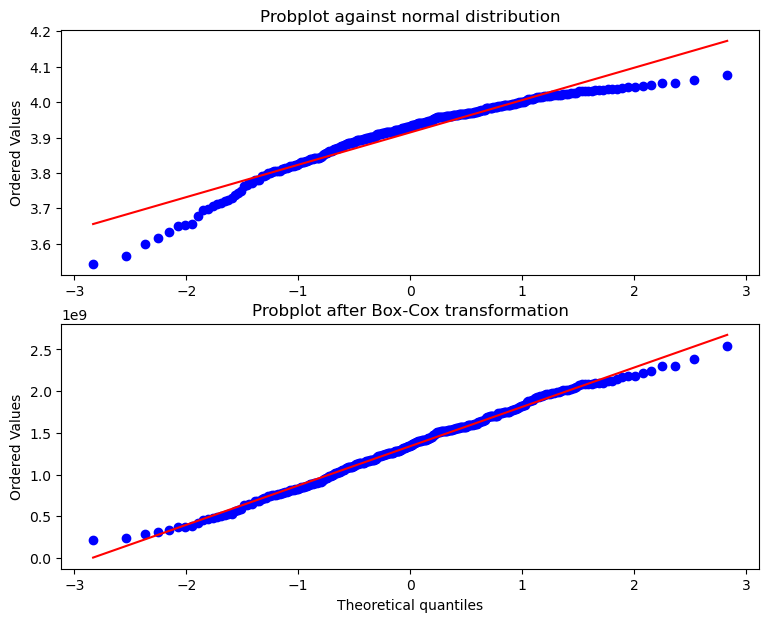

In [ ]:
# Create figure
fig = plt.figure(figsize=(9, 7))

# Subplot 1
ax1 = fig.add_subplot(211)
scs.probplot(exp_, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

# Subplot 2
ax2 = fig.add_subplot(212)
scs.probplot(boxcox_transformed[0], plot=ax2);
ax2.set_title('Probplot after Box-Cox transformation');

#The result of the above code snippet is this next plot. See how the Box-Cox transformed variable is much closer to the normality line.

Z Scores

Another transformation possible is calculating the Z-scores of the values in an array. The Z score is the equivalent value of the observation when it is transformed to a standard normal distribution (mean=0, std=1). The transformation is easy.

In [43]:
# Distribution
dist = [12,23,13,34,55,16,1]

# Calculating Z scores = "point_estimate - mean/std"
Z = scs.zscore(dist)
Z

array([-0.60825887,  0.06082589, -0.54743299,  0.72991065,  2.00725429,
       -0.36495532, -1.27734364])

In [44]:
#From that, we can use the CDF to calculate probabilities of a more extreme result than each point in the distribution.
# Use the cumulative distribution function (CDF) to find the probability
probability = scs.norm.cdf(Z)

for i,n in zip(probability,dist):
  if i < 0:
    print(f"Probability of a number more extreme than {n}:", i)
  else:
    print(f"Probability of a number more extreme than {n}:", 1-i)


Probability of a number more extreme than 12: 0.7284921038135481
Probability of a number more extreme than 23: 0.4757489366442327
Probability of a number more extreme than 13: 0.7079593510974136
Probability of a number more extreme than 34: 0.23272240120113985
Probability of a number more extreme than 55: 0.02236129701530054
Probability of a number more extreme than 16: 0.6424276224116628
Probability of a number more extreme than 1: 0.8992595228449655
